In [6]:
from clusopt_core.metrics import DistanceMatrix,Silhouette
from sklearn.metrics import pairwise_distances,silhouette_score
from sklearn.datasets import make_blobs
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

def timeit(callable_):
    start=time.time()
    callable_()
    end=time.time()
    return end-start

REPETITIONS=100


In [7]:
callable_pairs=[
    ("scikit learn",lambda dataset,labels:silhouette_score(distances,labels,metric="precomputed")),
    ("clusopt core",lambda dataset,labels:cpp_silhouette.get_score(distances,labels)),
]

dataset_configs=[#no_samples,dim,k
    (200,2,2),
    (200,2,100),
    (200,4000,2),
    (200,4000,100),

    (4000,2,2),
    (4000,2,100),
    (4000,4000,2),
    (4000,4000,100),
]



In [8]:
indexes=[]
data=[]

for no_samples,dim,k in dataset_configs:
    dataset,labels=make_blobs(centers=k,n_samples=no_samples,n_features=dim,random_state=42)
    dist_matrix=DistanceMatrix(no_samples)
    dist_matrix.compute(dataset)
    distances=dist_matrix.table

    cpp_silhouette = Silhouette(k)

    indexes.append(str((no_samples,dim,k)))

    entry=defaultdict(list)
    for _ in range(REPETITIONS):
        for method_name,callable_ in callable_pairs:
            entry[method_name].append(timeit(lambda :callable_(distances,labels)))

    data.append(entry)

In [9]:
mean=pd.DataFrame(
    [ 
        {
            k:np.mean(v)
            for k,v in entry.items()
        }
        for entry in data
    ],
    index=indexes
)
std=pd.DataFrame(
    [ 
        {
            k:np.std(v)
            for k,v in entry.items()
        }
        for entry in data
    ],
    index=indexes
)

Text(0.5, 1.0, 'clusopt core $\\times$ scikit learn : \n silhouette score execution time \n (lower is better)')

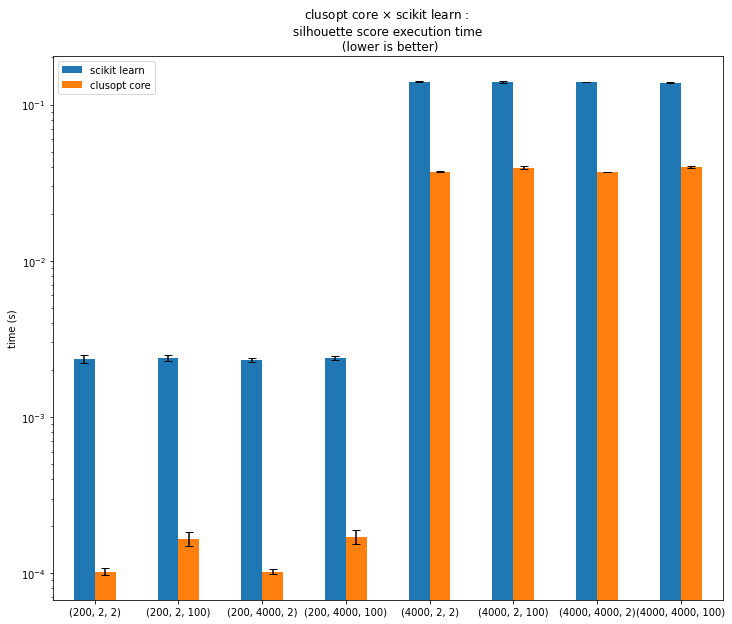

In [10]:
mean.plot.bar(ylabel="time (s)",yerr=std,capsize=4,rot=0)
plt.yscale("log")
fig=plt.gcf()
fig.set_size_inches(12, 10)

plt.savefig("silhouette.jpeg",dpi=300)
plt.title("clusopt core $\\times$ scikit learn : \n silhouette score execution time \n (lower is better)")
